In [ ]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt

In [ ]:
# Load data from mnist
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

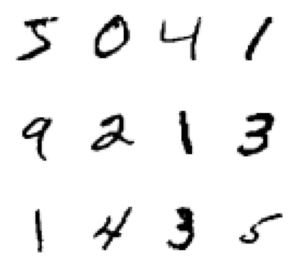

In [ ]:
#Show some images from X_train
plt.figure(figsize=(5,5))
for k in range(12):
  plt.subplot(3, 4, k+1)
  plt.imshow(X_train[k], cmap='Greys')
  plt.axis('off')

In [ ]:
#Flattening two-dimensional images to one dimension
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [ ]:
#Normalizing
X_train /= 255
X_valid /= 255

In [ ]:
#Converting integer labels to one-hot
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

In [ ]:
y_valid.shape

(10000, 10)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784, )))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Configure model
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

In [ ]:
# training the Shallow Learning Model
model.fit(X_train, y_train,
          batch_size=128, epochs=200, 
          verbose=1, 
          validation_data=(X_valid, y_valid))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 3s 48us/step - loss: 0.0945 - accuracy: 0.1001 - val_loss: 0.0940 - val_accuracy: 0.1058
Epoch 2/200
60000/60000 [==============================] - 1s 20us/step - loss: 0.0935 - accuracy: 0.1100 - val_loss: 0.0932 - val_accuracy: 0.1145
Epoch 3/200
60000/60000 [==============================] - 1s 20us/step - loss: 0.0928 - accuracy: 0.1256 - val_loss: 0.0925 - val_accuracy: 0.1333
Epoch 4/200
60000/60000 [==============================] - 1s 20us/step - loss: 0.0921 - accuracy: 0.1473 - val_loss: 0.0918 - val_accuracy: 0.1554
Epoch 5/200
60000/60000 [==============================] - 1s 20us/step - loss: 0.0915 - accuracy: 0.1704 - val_loss: 0.0913 - val_accuracy: 0.1774
Epoch 6/200
60000/60000 [==============================] - 1s 20us/step - loss: 0.0910 - accuracy: 0.1898 - val_loss: 0.0908 - val_accuracy: 0.1979
Epoch 7/200
60000/60000 [==============================] - 1s 

In [ ]:
model.evaluate(X_valid, y_valid)

10000/10000 [==============================] - 0s 40us/step


[0.028423249235749244, 0.8629000186920166]